In [44]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, re , nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
#from wordcloud import WordCloud, wordcloud

In [101]:
df_buruh = pd.read_csv("buruh_tweets_202112.csv")

In [102]:
df_buruh.head()

,tweet,userid
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958


In [88]:
#fungsi untuk pembersihan
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", data).split())
    data = re.sub(r"\d+","", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    data = [word for word in data if word not in sw_indonesia]
    data = ' '.join(data)
    return data
def slang_cleaner(data, slang_list:list=[]):
    word_token = word_tokenize(data)
    word_list = []

    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)

    data = ' '.join(word_list)
    return data

In [112]:
#fungsi analytic
def words_freq_distribution(data):
    data = data.apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(50)
    return most_common_word, tweets

def word_len_freq_distribution(data):
    bin_range = np.arange(0,50)
    plot_2 = plt.figure(2)
    data.str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.title("Distribusi jumlah kata per Tweet")
    
def mean_word_freq_distribution(data):
    plot_3 = plt.figure(3)
    data.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.title("Distribusi panjang kata rata-rata per tweet")

def bigram_freq_distribution(data):
    data_to_list = [word for news in data for word in news.split()]
    result = pd.Series(nltk.ngrams(data_to_list,2)).value_counts()[:20]
    return result

def char_freq_distribution(data):
    bins = np.arange(0,270,10)
    plot_1 = plt.figure(1)
    data.str.len().hist(bins=bins)
    plt.title("Distribusi jumlah huruf per tweet")


In [103]:
df_buruh["clean_tweet"] = df_buruh["tweet"].apply(lambda x: case_folding(x))
df_buruh["clean_tweet"] = df_buruh["clean_tweet"].apply(lambda x: word_tokenize(x))
df_buruh["clean_tweet"] = df_buruh["clean_tweet"].apply(lambda x: stopword_cleaner(x))

In [104]:
df_buruh.head()

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688,sesuai kesepakatan buruh tangerang raya tolak ...
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978,demo buruh yg berjubel izin terang benderang
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497,demo buruh rentan ditunggangi provokator ayo d...
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896,buruh pp kemarin demo gak tuh pasalan yg polis...
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958,berikanlah buruh upahnya kering keringatnya hr...


In [91]:
most_common_word = words_freq_distribution(df_buruh["clean_tweet"])
#print(most_common_word)

In [73]:
slang_list = [
    ('yg','yang'),
    ('umk','upah minimum kota'),
    ('aja','saja'),
    ('ya','iya'),
    ('gak','tidak'),
    ('ump','upah minimum provinsi'),
    ('kalo','kalau'),
    ('amp',''),
    ('jg','juga'),
    ('jd','jadi'),
    ('klo','kalau'),
    ('uu','undang-undang'),
    ('sih',''),
    ('udah','sudah'),
    ('dgn','dengan')
]

In [105]:
df_buruh["clean_tweet"] = df_buruh["clean_tweet"].apply(lambda x: slang_cleaner(x, slang_list))
df_buruh["clean_tweet"] = df_buruh["clean_tweet"].apply(lambda x: word_tokenize(x))
df_buruh["clean_tweet"] = df_buruh["clean_tweet"].apply(lambda x: stopword_cleaner(x))


In [106]:
df_buruh.head()

,tweet,userid,clean_tweet
0,"Tak Sesuai Kesepakatan, Buruh Tangerang Raya T...",58880688,sesuai kesepakatan buruh tangerang raya tolak ...
1,@Resty442_ Kenapa demo buruh yg berjubel2 dapa...,1330047738541694978,demo buruh berjubel izin terang benderang
2,Demo Buruh Rentan Ditunggangi Provokator\nhttp...,1213739491384426497,demo buruh rentan ditunggangi provokator ayo d...
3,"@geloraco buruh, PP juga kemarin demo gak ada ...",930191748688592896,buruh pp kemarin demo tuh pasalan polisi pasie...
4,Berikanlah kepada buruh upahnya sebelum kering...,62988958,berikanlah buruh upahnya kering keringatnya hr...


(upah, minimum)        201
(minimum, kota)        123
(demo, buruh)          102
(minimum, provinsi)     65
(buruh, demo)           59
(kenaikan, upah)        46
(buruh, pabrik)         36
(upah, buruh)           34
(buruh, berjiwa)        30
(penetapan, upah)       30
(serikat, buruh)        26
(kaum, buruh)           24
(buruh, buruh)          22
(gaji, buruh)           22
(buruh, upah)           19
(kota, buruh)           18
(tuntut, upah)          18
(mogok, kerja)          17
(cipta, kerja)          16
(aksi, buruh)           16
dtype: int64


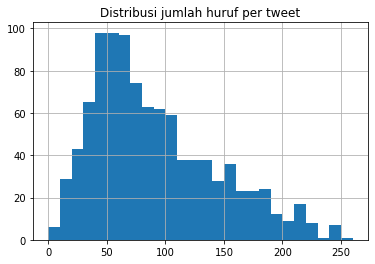

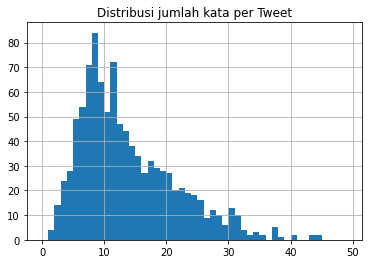

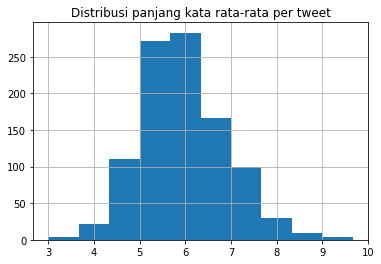

In [113]:
char_freq_distribution(df_buruh['clean_tweet'])
word_len_freq_distribution(df_buruh['clean_tweet'])
mean_word_freq_distribution(df_buruh['clean_tweet'])
bigram_result = bigram_freq_distribution(df_buruh['clean_tweet'])
print(bigram_result)

plt.show()